# Direction Fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

# For nicely displayed output from SymPy, we need to initialize its printing system
sympy.init_printing()

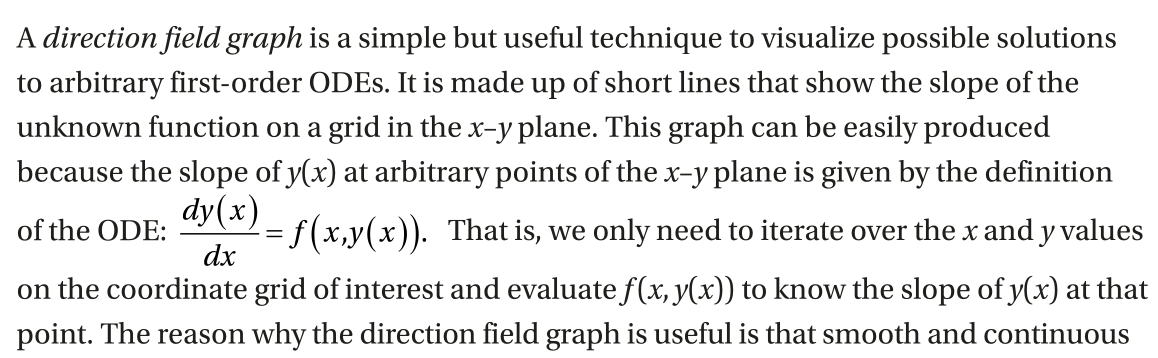

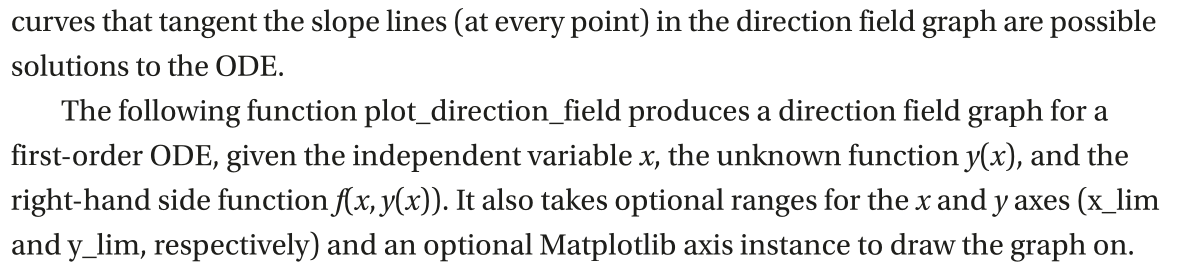

In [2]:
# Book example

def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
        
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            # Normalize
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            # Draw a field plot
            ax.plot([xx - Dx/2, xx + Dx/2], [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" % (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))), fontsize=18)
    return ax

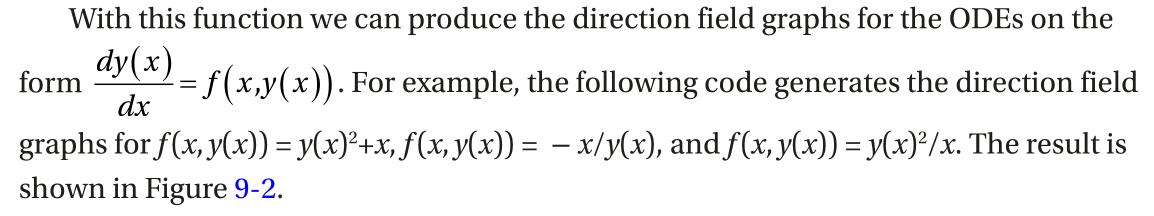

CPU times: user 169 ms, sys: 3.88 ms, total: 173 ms
Wall time: 174 ms
CPU times: user 240 ms, sys: 3.96 ms, total: 244 ms
Wall time: 245 ms
CPU times: user 180 ms, sys: 1.92 ms, total: 181 ms
Wall time: 182 ms


<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

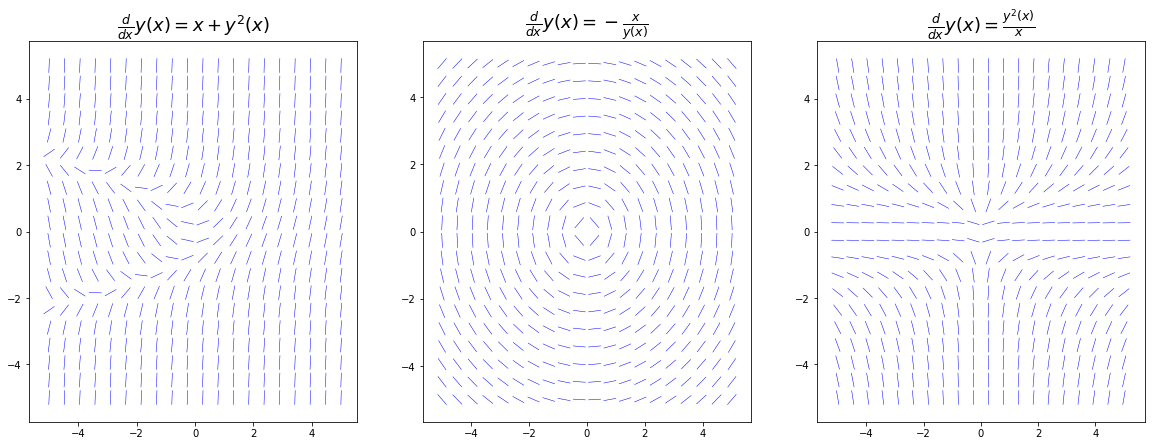

In [3]:
x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

%time plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
%time plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
%time plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

> Direction fields for three first-order differential equations

### Example 2: direction field from meshgrid

Probably this version much more performant, because of routines `np` and `plt`

Init 2 `np.linspace` and generate `np.meshgrid` from that vectors

In [4]:
def plot_direction_field2(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    # Generate 2 linspace
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    # Init meshgrid
    X, Y = np.meshgrid(x_vec, y_vec)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
        
    dx = 1
    Dy = f_np(X, Y)
    
    # Normalize arrows - divide by length to get close to unit vectors
    N = np.sqrt(dx**2 + Dy**2)

    # Normalize
    Dy = Dy / N
    Dx = dx / N

    # Use quiver instead of plot
    ax.quiver(X, Y, Dx, Dy, angles="xy")

    ax.set_title(r"$%s$" % (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))), fontsize=18)
    return ax

CPU times: user 2.54 ms, sys: 0 ns, total: 2.54 ms
Wall time: 2.56 ms
CPU times: user 2.41 ms, sys: 21 µs, total: 2.43 ms
Wall time: 2.19 ms
CPU times: user 2.24 ms, sys: 0 ns, total: 2.24 ms
Wall time: 2.04 ms


<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = \\frac{y^{2}{\\left(x \\right)}}{x}$'}>

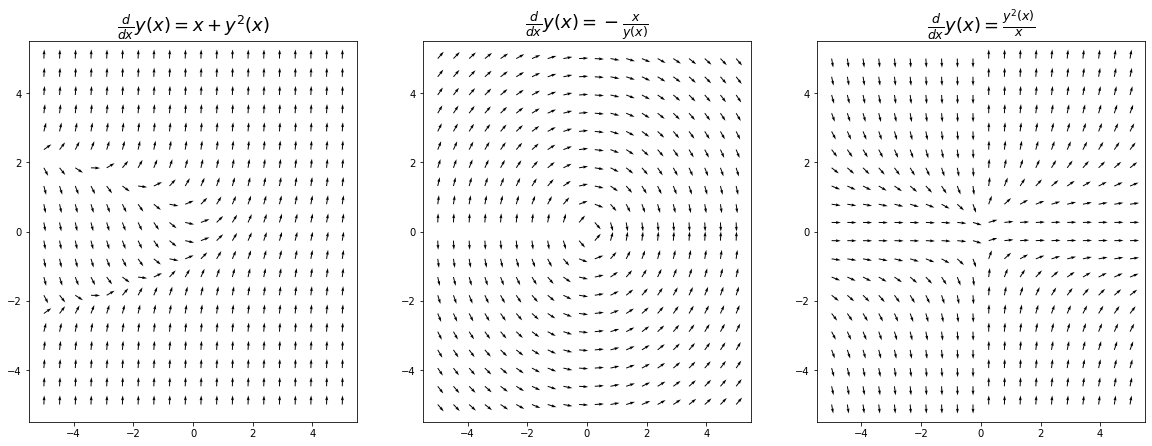

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

%time plot_direction_field2(x, y(x), y(x)**2 + x, ax=axes[0])
%time plot_direction_field2(x, y(x), -x / y(x), ax=axes[1])
%time plot_direction_field2(x, y(x), y(x)**2 / x, ax=axes[2])

> Direction fields for three first-order differential equations with `quiver`

10 times render diff because of `np` and `plt` routines!

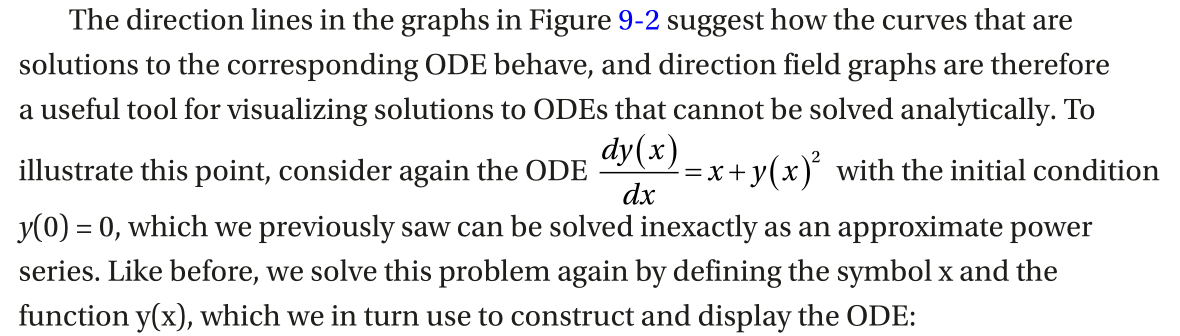

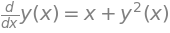

In [6]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [7]:
# Error again...
ics = {y(0): 0}

#ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
#ode_sol

## Examples

Differential equations and Linear Algebra by Gil. String
pages 155-156

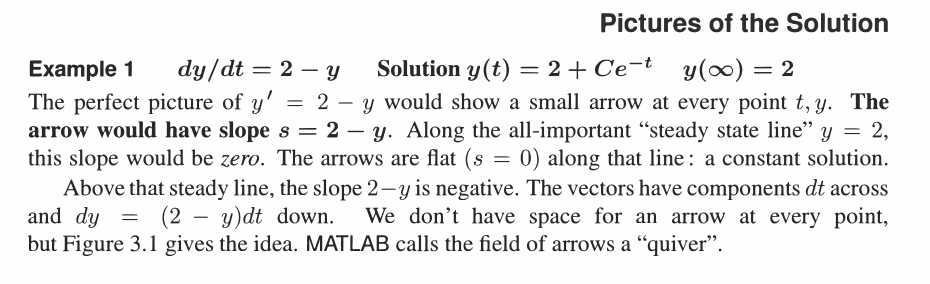

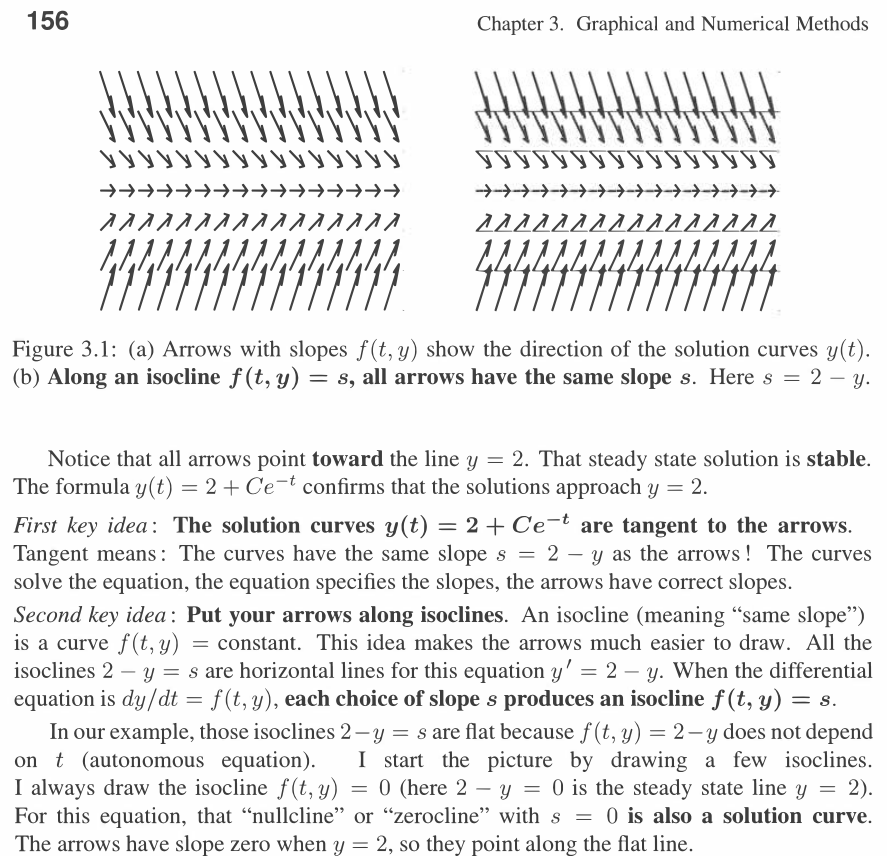

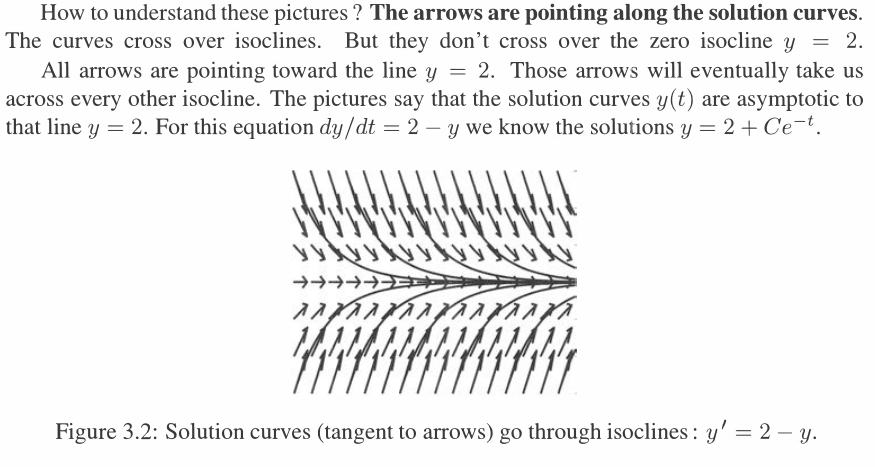

In [8]:
x = sympy.symbols("x")
y = sympy.Function("y")

#### Build ODE

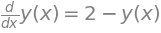

In [9]:
f = 2 - y(x)
dy = y(x).diff(x)

ode = sympy.Eq(dy, f)
ode

#### Solution

In [10]:
ode_sol = sympy.dsolve(dy - f)
ode_sol

### Solution curves builder

In [11]:
def build_soution_curves(c_vec, sol, x_lim=(-1, 5), y_lim=(-1, 5), ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
        
    for i, cc in enumerate(c_vec):
        f_np = sympy.lambdify(x, sol(cc), 'numpy')
        y_vec = f_np(c_vec)
        ax.plot(c_vec, y_vec, 'b')
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)

### Slope field with solution curves Figure 3.2

CPU times: user 10 ms, sys: 5 µs, total: 10 ms
Wall time: 10.2 ms


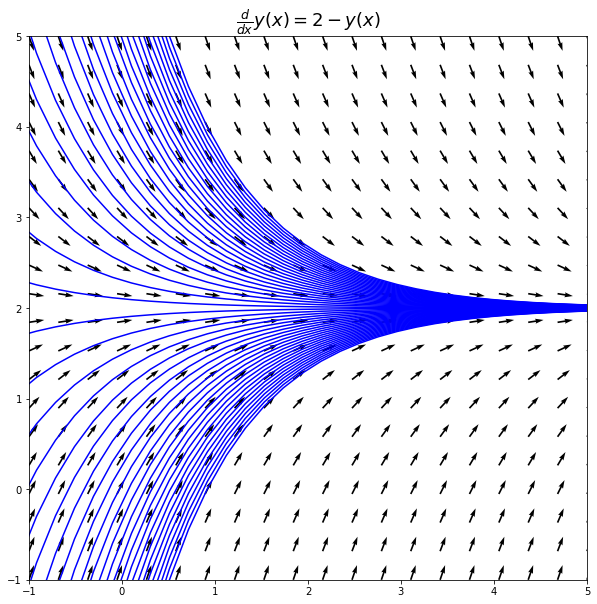

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

x_lim = (-1, 5)
y_lim = (-1, 5)

# Make lambda with param C
sol = lambda C: 2 + C * sympy.exp(-x)

# Linspace for the lines
c_vec = np.linspace(-5, 5, 50)

# Slope field
%time plot_direction_field2(x, y(x), f, x_lim=x_lim, y_lim=y_lim, ax=ax)

# Solution curves
build_soution_curves(c_vec, sol, x_lim=(-1, 5), y_lim=(-1, 5), ax=ax)

> Solution curves (tangent to arrows) go through isoclines: $y'= 2 - y$

Differential equations and Linear Algebra by Gil. String
pages 157-158

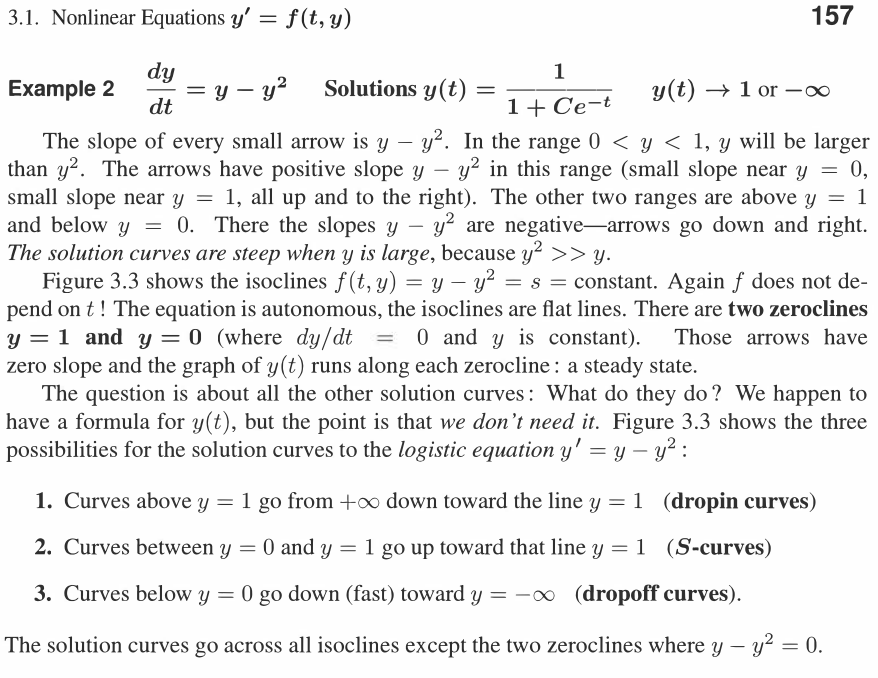

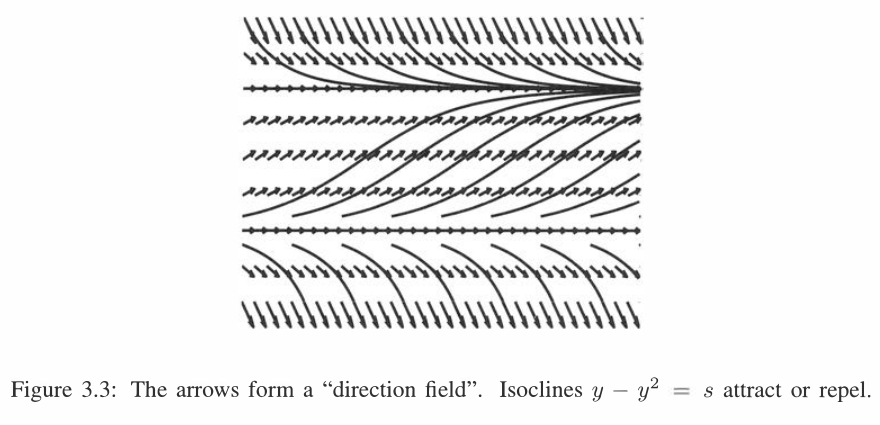

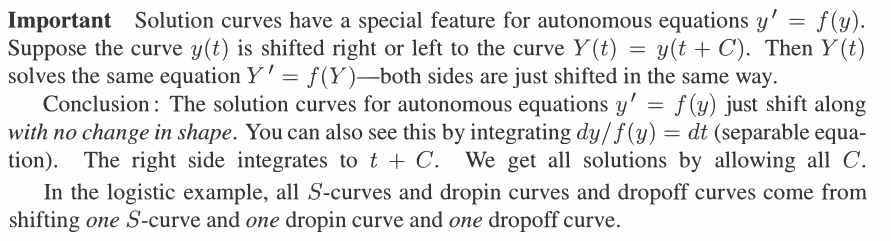

#### Build ODE

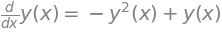

In [13]:
f = y(x) - y(x)**2
dy = y(x).diff(x)

ode = sympy.Eq(dy, f)
ode

#### Solution

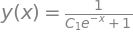

In [14]:
ode_sol = sympy.dsolve(dy - f)
ode_sol

### Slope field with solution curves

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = - y^{2}{\\left(x \\right)} + y{\\left(x \\right)}$'}>

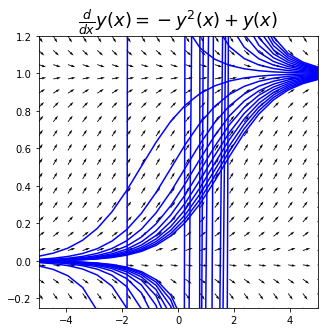

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

x_lim = (-5, 5)
y_lim = (-0.25, 1.2)

# Solution Curves Figure 3.3

# Make lambda with param C
sol = lambda C: 1 / (C * sympy.exp(-x) + 1)

# Linspace for the lines
c_vec = np.linspace(-5, 5, 20)

build_soution_curves(c_vec, sol, x_lim=x_lim, y_lim=y_lim, ax=ax)

# Slope field
plot_direction_field2(x, y(x), f, x_lim=x_lim, y_lim=y_lim, ax=ax)

> Vertical lines - changes of direction for curves

Differential equations and Linear Algebra by Gil. String pages 158

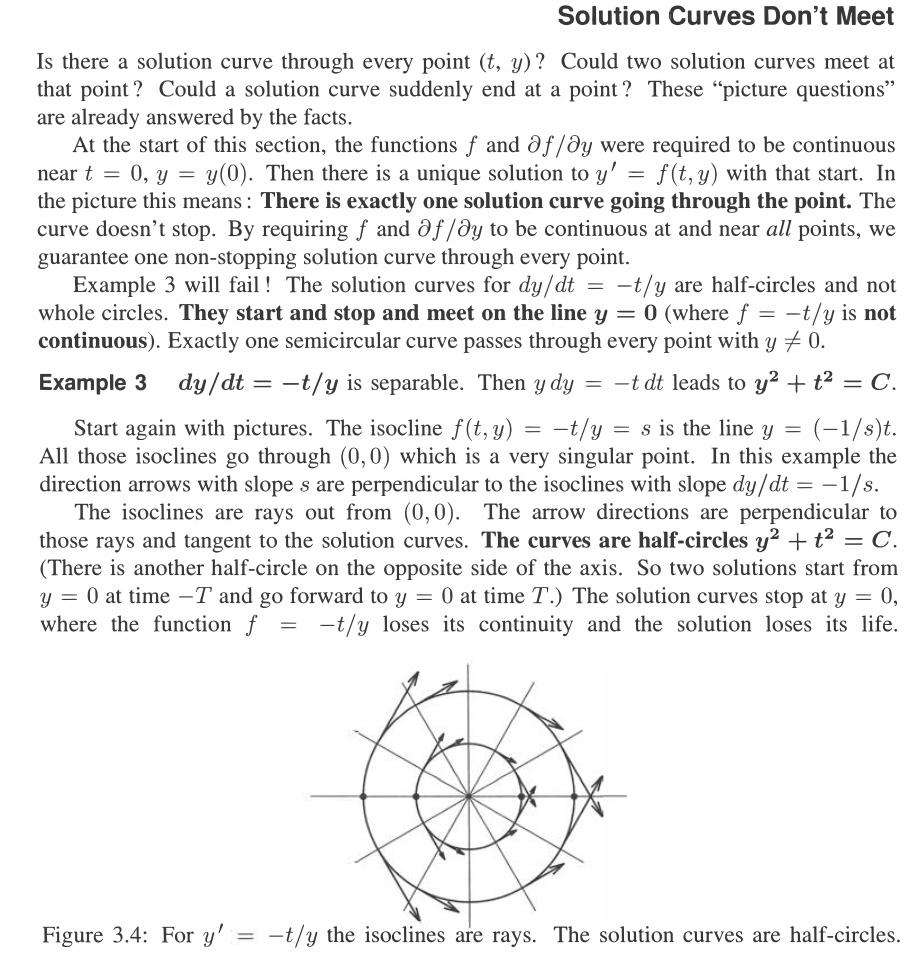

#### Build ODE

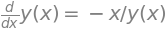

In [16]:
f = -x/y(x)
dy = y(x).diff(x)

ode = sympy.Eq(dy, f)
ode

#### Solution

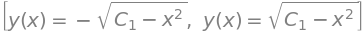

In [17]:
ode_sol = sympy.dsolve(dy - f)
ode_sol

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = - \\frac{x}{y{\\left(x \\right)}}$'}>

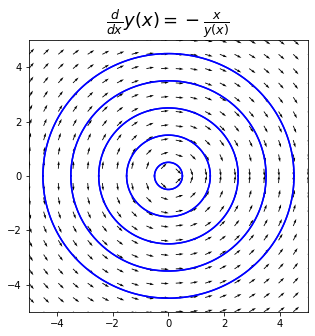

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

x_lim = (-5, 5)
y_lim = (-5, 5)

# Solution Curves Figure 3.4

phi = np.linspace(0, 2*np.pi, 200)

# Make equation for the circles
x_lambda = lambda R: R*np.cos(phi)
y_lambda = lambda R: R*np.sin(phi)

# Linspace for the lines
c_vec = np.linspace(-4.5, 4.5, 10)

# Draw the circles
for i, cc in enumerate(c_vec):
    x_vec = x_lambda(cc)
    y_vec = y_lambda(cc)
    ax.plot(x_vec, y_vec, 'b')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

# Slope field
plot_direction_field2(x, y(x), f, x_lim=x_lim, y_lim=y_lim, ax=ax)